CIFAR-10 classification with k-NN
---

> **Exercise**: Load the data from the `c4_cifar10-6k.npz` file into X/y arrays. The data type of the input matrix `X` should be `float64`. Split it into train (5,000 images) and test (1,000) sets using the `train_test_split()` function. Set the `random_state` to zero. 

In [1]:
import numpy as np
import os

# Load the numpy .npz file
with np.load("c4_cifar10-6k.npz", allow_pickle=False) as data:
    mnist_data = dict(data.items())

print("Data loaded")
print("It is a dictionary with keys:", list(mnist_data.keys()))

Data loaded
It is a dictionary with keys: ['data', 'labels', 'names']


In [2]:
# Create X/y arrays
X = mnist_data["data"]
y = mnist_data["labels"]

print("X:", X.shape, X.dtype)
print("y:", y.shape, y.dtype)

X: (6000, 3072) uint8
y: (6000,) int32


In [3]:
from sklearn.model_selection import train_test_split

# Convert the type of the input matrix to float
X = X.astype(np.float)

# Split data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, train_size=5000, test_size=1000, random_state=0
)

Exercise: Data exploration
---

The ten categories are numerically encoded with digits between 0 and 9.

| digit | category   | digit | category   |
|-------|------------|-------|------------|
| 0     | airplane   | 5     | dog        |
| 1     | automobile | 6     | frog       |
| 2     | bird       | 7     | horse      |
| 3     | cat        | 8     | ship       |
| 4     | deer       | 9     | truck      |

> **Exercise**: What is the proportion of images in each category? Plot a few images from the dataset.

In [4]:
import pandas as pd

# The categories correspond to digits from 0 and 9
# There is approximately the same proportion of images (~10%) for each class
pd.value_counts(y, normalize=True)

8    0.103333
2    0.103167
6    0.102667
9    0.102167
4    0.101833
0    0.101667
7    0.099500
5    0.097167
3    0.096667
1    0.091833
dtype: float64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: 5


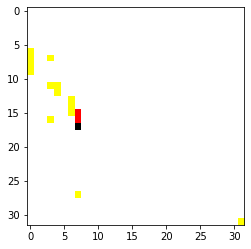

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: 3


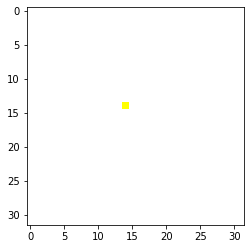

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: 6


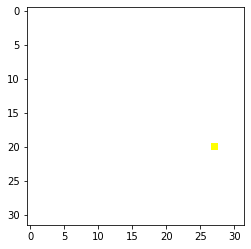

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Function to plot the i-th image from some X/y arrays
def show_image(idx, X, y):
    # Get image pixels from the input matrix X
    flat_img = X[idx]  # has shape (784,)

    # Reshape image into a 28x28 array
    img = flat_img.reshape(32, 32, 3)

    # Print label using the output vector y
    print("Label:", y[idx])

    # Plot image with pyplot
    plt.imshow(img)
    plt.show()


# Show the first images from the training set
show_image(0, X_tr, y_tr)
show_image(1, X_tr, y_tr)
show_image(2, X_tr, y_tr)

Exercise: Fit a *k*-NN classifier
---

> **Exercise**: Create a *k*-NN classifer and tune it using grid search for the following hyperparameters.
> 1. The number of neighbors: define a set of reasonable values
> 1. The weighting function: "uniform" or "distance"
> 1. The distance metric: L1 or L2

ValueError: cannot reshape array of size 3072 into shape (28,28)